<a href="https://colab.research.google.com/github/revathys/AIMLLearn/blob/main/colab_activity9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Colab Activity 9.2: Comparing the Ridge to Ordinary Least Squares (OLS)

**Expected Time: 30 Minutes**


This activity focuses on comparing the models resulting from a `LinearRegression` model compared to a low penalty and high penalty `Ridge` model.  A synthetic polynomial dataset is used to compare the resulting model shapes.  Please pay attention to the resulting complexity and size of the coefficients as the amount of regularization changes.

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('data/synthetic_9.4.csv')

In [4]:
X, y = data[['x']], data['y']

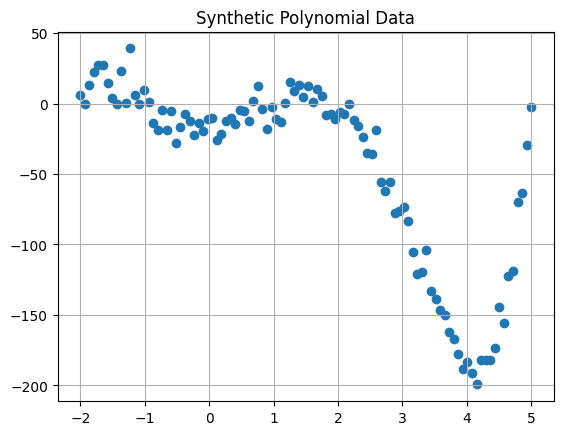

In [5]:
plt.scatter(X, y)
plt.title('Synthetic Polynomial Data')
plt.grid();

### Problem 1

#### Polynomial Features and Linear Regression Pipeline



To begin, you are to construct a `Pipeline` object with the following steps:

- A  `poly_features` generated using `PolynomialFeatures()`with `degree = 5` polynomial features and `include_bias = False`.
- A `linreg` step generated using `LinearRegression()` with default values.

Assign this pipeline to `ols_pipe`.

Next, use the `fit` function to train your model on `X` and `y`.

Finally, use the `predict` function to calculate your predictions of `X`; assign your result to `ols_preds` below.

In [7]:


ols_pipe = Pipeline([("poly_features", PolynomialFeatures(degree=5, include_bias=False)),("linreg", LinearRegression())])
ols_preds = ols_pipe.fit(X, y).predict(X)



# Answer check
ols_pipe

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('linreg', LinearRegression())])

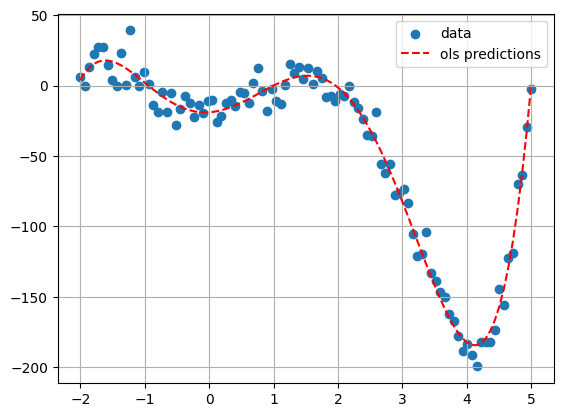

In [10]:
# Uncomment to visualize solutions
Xnp = X.to_numpy()
plt.scatter(Xnp, y, label = 'data')
plt.plot(Xnp, ols_preds, 'r--', label = 'ols predictions')
plt.legend()
plt.grid();

### Problem 2

#### Ridge model with small regularization penalty



To begin, you are to construct a `Pipeline` object with the following steps:

- A  `poly_features` generated using `PolynomialFeatures()`with `degree = 5` polynomial features and `include_bias = False`.
- A `ridge_low` step generated using `Ridge()` with `alpha = 0.1`.

Assign this pipeline to `ridge_low_pipe`.

Next, use the `fit` function to train your model on `X` and `y`.

Finally, use the `predict` function to calculate your predictions of `X`; assign your result to `ridge_low_preds` below.

In [11]:


ridge_low_pipe = Pipeline([("poly_features",PolynomialFeatures(degree=5, include_bias=False)),("ridge_low",Ridge(alpha=0.1))])
ridge_low_preds = ridge_low_pipe.fit(X, y).predict(X)


# Answer check
ridge_low_pipe

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('ridge_low', Ridge(alpha=0.1))])

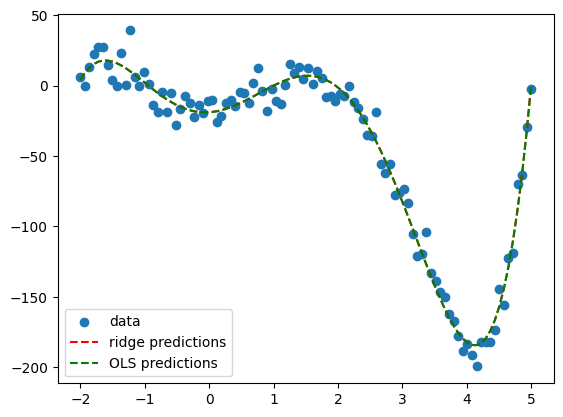

In [12]:
## Uncomment to visualize solutions
Xnp = X.to_numpy()
plt.scatter(Xnp, y, label = 'data')
plt.plot(Xnp, ridge_low_preds, '--r', label = 'ridge predictions')
plt.plot(Xnp, ols_preds, '--g', label = 'OLS predictions')
plt.legend();

### Problem 3

#### High Regularization Ridge



To begin, you are to construct a `Pipeline` object with the following steps:

- A  `poly_features` generated using `PolynomialFeatures()`with `degree = 5` polynomial features and `include_bias = False`.
- A `ridge_high` step generated using `Ridge()` with `alpha = 1000`.

Assign this pipeline to `ridge_high_pipe`.

Next, use the `fit` function to train your model on `X` and `y`.

Finally, use the `predict` function to calculate your predictions of `X`; assign your result to `ridge_high_preds` below.

In [14]:


ridge_high_pipe = Pipeline([("poly_features",PolynomialFeatures(degree=5, include_bias=False)),("ridge_high",Ridge(alpha=1000))])
ridge_high_preds = ridge_high_pipe.fit(X, y).predict(X)



# Answer check
ridge_high_pipe

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('ridge_high', Ridge(alpha=1000))])

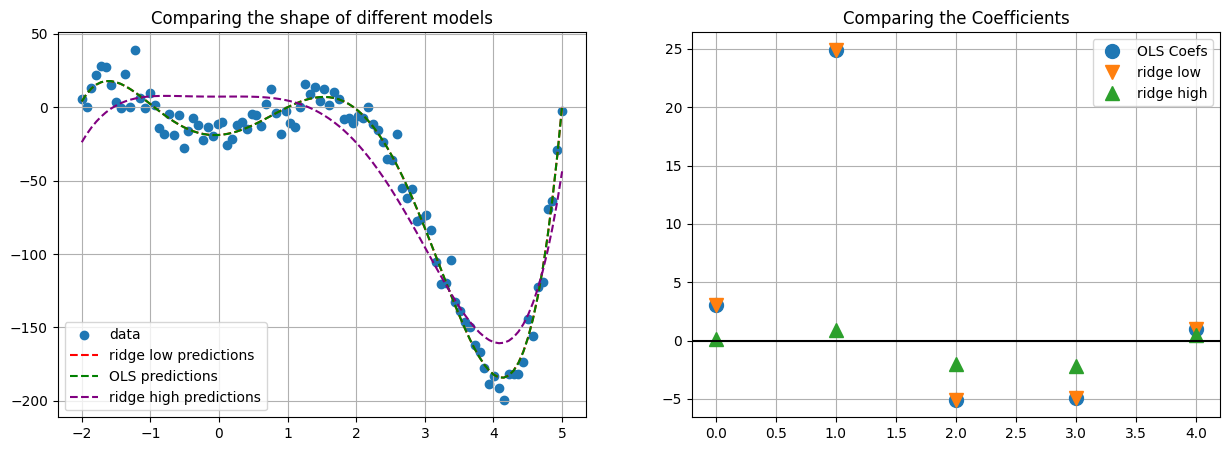

In [15]:
## Uncomment to visualize solutions
Xnp = X.to_numpy()
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].scatter(Xnp, y, label = 'data')
ax[0].plot(Xnp, ridge_low_preds, '--r', label = 'ridge low predictions')
ax[0].plot(Xnp, ols_preds, '--g', label = 'OLS predictions')
ax[0].plot(Xnp, ridge_high_preds, '--', color = 'purple', label = 'ridge high predictions')
ax[0].set_title('Comparing the shape of different models')
ax[0].legend();
ax[0].grid();
ax[1].plot(ols_pipe.named_steps['linreg'].coef_, 'o', markersize = 10, label = 'OLS Coefs')
ax[1].plot(ridge_low_pipe.named_steps['ridge_low'].coef_, 'v', markersize = 10, label = 'ridge low')
ax[1].plot(ridge_high_pipe.named_steps['ridge_high'].coef_, '^', markersize = 10, label = 'ridge high')
ax[1].legend();
ax[1].axhline(color = 'black')
ax[1].grid();
ax[1].set_title('Comparing the Coefficients');